In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.cluster import MiniBatchKMeans

from utils.paths import DATA_RAW_DIR

In [4]:
path_candy = str(DATA_RAW_DIR / "candy.csv")
print(Path(path_candy).exists())

True


In [5]:
df_candy = pd.read_csv(path_candy, sep=",", encoding="utf-8")
df_candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [6]:
df_candy.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [7]:
df_candy.duplicated().sum()

np.int64(0)

In [8]:
df_candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


## Unsupervisor Model

In [9]:
df_candy.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [10]:
df_candy.dtypes

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

In [11]:
X = df_candy.drop(columns=["competitorname"], axis=1)


In [ ]:
# k-means clustering

model_kmeans = MiniBatchKMeans(n_clusters=4, batch_size=8, random_state=42)
model_kmeans.fit(X)
df_candy["cluster"] = model_kmeans.labels_
y_pred = model_kmeans.predict(X)
df_candy["cluster_y"] = y_pred

df_candy.head()


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster,cluster_y
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,2,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,1,1
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,3,3
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,3,3


In [18]:
# centroids
centroids = model_kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=X.columns)
print("Centroids:")
print(centroids_df)

Centroids:
   chocolate    fruity   caramel  peanutyalmondy    nougat  crispedricewafer  \
0   0.666667  0.333333  0.273810        0.107143  0.071429          0.273810   
1   0.141026  0.500000  0.089744        0.051282  0.038462          0.000000   
2   1.000000  0.000000  0.192308        0.692308  0.230769          0.115385   
3   0.212121  0.727273  0.030303        0.060606  0.030303          0.030303   

       hard       bar  pluribus  sugarpercent  pricepercent  winpercent  
0  0.047619  0.476190  0.523810      0.531952      0.571583   59.966278  
1  0.333333  0.038462  0.641026      0.429090      0.364590   33.984691  
2  0.000000  0.384615  0.461538      0.566250      0.624923   73.825731  
3  0.272727  0.121212  0.515152      0.480303      0.373970   46.735260  


In [13]:
df_candy['diff'] = df_candy['cluster'] - df_candy['cluster_y']

In [15]:
df_candy['diff'].sum()

np.int64(0)

There is not difference between 
```python
# .labels_ property
df_candy["cluster"] = model_kmeans.labels_ # Option after fit model
# prediction
y_pred = model_kmeans.predict(X) # option with new data
```

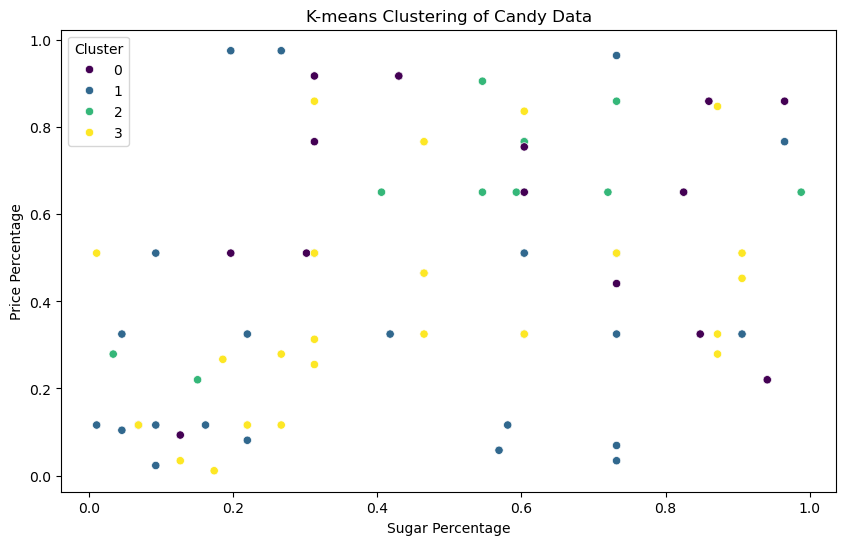

In [17]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_candy, x='sugarpercent', y='pricepercent',
                hue='cluster', palette='viridis', markers=['o', 's'])
plt.title('K-means Clustering of Candy Data')
plt.xlabel('Sugar Percentage')
plt.ylabel('Price Percentage')
plt.legend(title='Cluster')
plt.show()

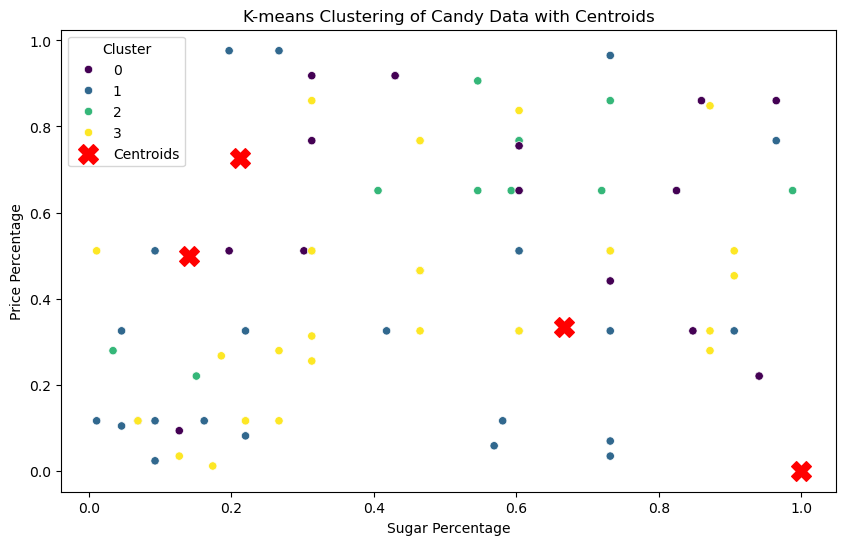

In [19]:
# visualization centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_candy, x='sugarpercent', y='pricepercent',
                hue='cluster', palette='viridis', markers=['o', 's'])
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering of Candy Data with Centroids')
plt.xlabel('Sugar Percentage')
plt.ylabel('Price Percentage')
plt.legend(title='Cluster')
plt.show()